Mounted at /content/drive


In [13]:
!pip install nltk
!pip install pandas
!pip install datetime
!pip install numpy
!pip install SentimentIntensityAnalyzer

ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer


In [14]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from datetime import datetime
import numpy as np

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# Download the VADER lexicon if you haven't already
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

In [17]:
# Load the CSV file into a pandas DataFrame

# Mount Baw Baw
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-3-detailed-reviews.csv')

# Mount Buller
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-7-detailed-reviews.csv')

# Mount Hotham
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-9-detailed-reviews.csv')

# Mount Perisher
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-11-detailed-reviews.csv')

# Thredbo
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-13-detailed-reviews.csv')

# Falls Creek
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/all-task-17-detailed-reviews.csv')

In [18]:
# Sentiment Analysis with (DARTH) VADER

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate and scale the sentiment score
def get_sentiment_score(text):
    """
    Calculates the sentiment score for a given text using VADER's compound score
    and scales it to a 1-100 range.
    """
    # VADER's polarity_scores() returns a dictionary with negative, neutral,
    # positive, and compound scores. The compound score is a normalized,
    # weighted composite score.
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        compound_score = scores['compound']
        # Scale the compound score from [-1, 1] to [0, 100]
        return (compound_score + 1) * 50
    # Return a neutral score for non-string (e.g., NaN) values
    return 50

def get_trustworthiness_and_print_scores(df):

    # Apply the function to the 'review_text' column
    # Fill any missing review_text with an empty string to avoid errors
    df['sentiment_score'] = df['review_text'].fillna('').apply(get_sentiment_score)


    # Trustworthiness Score

    # Convert 'published_at_date' to datetime objects
    # The date format is inferred automatically by pandas
    df['published_at_datetime'] = pd.to_datetime(df['published_at_date'])

    # Calculate the recency of the review
    current_date = datetime.now()
    df['review_age_days'] = (current_date - df['published_at_datetime']).dt.days

    # Normalize the recency score (more recent = higher score)
    # Using a simple linear normalization for this example
    min_age = df['review_age_days'].min()
    max_age = df['review_age_days'].max()
    df['recency_score'] = 1 - ((df['review_age_days'] - min_age) / (max_age - min_age))

    # Normalize the total number of reviews and photos
    # Using a log transformation to reduce the impact of outliers
    # Adding 1 to avoid log(0)
    df['log_reviews'] = np.log1p(df['total_number_of_reviews_by_reviewer'])
    df['log_photos'] = np.log1p(df['total_number_of_photos_by_reviewer'])

    # Min-max scaling for log_reviews and log_photos
    min_log_reviews = df['log_reviews'].min()
    max_log_reviews = df['log_reviews'].max()
    df['reviews_score'] = (df['log_reviews'] - min_log_reviews) / (max_log_reviews - min_log_reviews)

    min_log_photos = df['log_photos'].min()
    max_log_photos = df['log_photos'].max()
    df['photos_score'] = (df['log_photos'] - min_log_photos) / (max_log_photos - min_log_photos)


    # Calculate the trustworthiness score using a weighted average
    # The weights can be adjusted based on what is considered more important
    weights = {
        # How recent a review is
        'recency': 0.2,
        # How many reviews they have
        'reviews': 0.4,
        # How many photos they posted
        'photos': 0.4
    }

    df['trustworthiness_score'] = (
        df['recency_score'] * weights['recency'] +
        df['reviews_score'] * weights['reviews'] +
        df['photos_score'] * weights['photos']
    ) * 100 # Scaling to 100

    # Display Results

    # Display the DataFrame with the new sentiment and trustworthiness scores
    # We will show the original review text and the calculated scores for context
    print(df[['review_text', 'sentiment_score', 'total_number_of_reviews_by_reviewer', 'total_number_of_photos_by_reviewer', 'published_at_date', 'trustworthiness_score']].head())

    # You can also get a summary of the new columns
    print("\nSummary of Sentiment and Trustworthiness Scores:")
    print(df[['sentiment_score', 'trustworthiness_score']].describe())

In [19]:
print("Mount Baw Baw alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df)

Mount Baw Baw alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0                       My first snow experience....           50.000   
1                                                NaN           50.000   
2                                                NaN           50.000   
3  Otlichnoe mesto dlya vstrechi s nastoyashchey ...           64.525   
4                          Great place for beginners           81.245   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                    3                                  87   
1                                  479                                2136   
2                                    6                                   0   
3                                  420                                8022   
4                                    8                                  33   

     published_at_date  tr

In [20]:
# Mount Buller
print("Mount Buller alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df1)

Mount Buller alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0                                                NaN            50.00   
1  Mount Buller has a beautiful location and grea...            97.57   
2                                                NaN            50.00   
3                              Must visit in winters            50.00   
4  Mount Buller Alpine Central is the perfect hub...            98.88   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                   35                                1942   
1                                   98                                  96   
2                                    4                                 102   
3                                  164                                 455   
4                                   96                                 133   

     published_at_date  tru

In [21]:
# Mount Hotham
print("Mount Hotham alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df2)

Mount Hotham alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0                                                NaN           50.000   
1                                                NaN           50.000   
2  Would be 5, but road clearing, ice & snow, not...            7.935   
3  DODGY DODGY DODGY\n\nHOTHAM ENCOURAGES YOU TO ...            1.520   
4                 Great place to play ski n boarding           87.895   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                    5                                  11   
1                                   32                                  49   
2                                   21                                   4   
3                                   10                                   0   
4                                   50                                   8   

     published_at_date  tru

In [22]:
# Mount Perisher
print("Perisher alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df3)

Perisher alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0  The worst skiing experience. They had many unf...            4.620   
1  Absolutely an amazing place. I am from Canada ...           99.165   
2                                                NaN           50.000   
3                                                NaN           50.000   
4                                                NaN           50.000   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                    7                                   0   
1                                  388                                1086   
2                                   21                                  49   
3                                    8                                  31   
4                                    6                                  12   

     published_at_date  trustwo

In [23]:
# Thredbo
print("Thredbo alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df4)

Thredbo alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0  Loved our days experience at Thredbo.  Took th...           85.890   
1  Been coming here for years, staff have become ...           17.365   
2                                                NaN           50.000   
3                                                NaN           50.000   
4                                                NaN           50.000   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                  979                                3816   
1                                   10                                   1   
2                                    4                                   4   
3                                  123                                 132   
4                                    6                                  12   

     published_at_date  trustwor

In [24]:
# Falls Creek
print("Falls Creek alpine resort Sentiment and Trustworthiness Scores:")
get_trustworthiness_and_print_scores(df5)

Falls Creek alpine resort Sentiment and Trustworthiness Scores:
                                         review_text  sentiment_score  \
0  love this place . I have been comming hear wit...           94.530   
1  We had a wonderful stay at Falls Creek Alpine ...           99.610   
2  Snowed on top till mid august 2025...but may c...           60.115   
3  falls creek was very much amazing i went there...           91.745   
4                                                NaN           50.000   

   total_number_of_reviews_by_reviewer  total_number_of_photos_by_reviewer  \
0                                  155                                  60   
1                                    4                                   3   
2                                   15                                   1   
3                                   13                                   2   
4                                    4                                   8   

     published_at_date  trus

In [29]:
# Step 1: Create Location Identifiers
df['location'] = 'Mount Baw Baw'
df1['location'] = 'Mount Buller'
df2['location'] = 'Mount Hotham'
df3['location'] = 'Mount Perisher'
df4['location'] = 'Thredbo'
df5['location'] = 'Falls Creek'

# Step 2: Combine DataFrames
all_reviews_df = pd.concat([df, df1, df2, df3, df4, df5], ignore_index=True)

all_reviews_df.head(5)

,place_id,place_name,review_id,review_link,name,reviewer_id,reviewer_profile,rating,review_text,published_at,...,sentiment_score,published_at_datetime,review_age_days,recency_score,log_reviews,log_photos,reviews_score,photos_score,trustworthiness_score,location
0,ChIJi6bNtLz5KGsRkBZX0xXNhE0,Mount Baw Baw Alpine Resort,Ci9DQUlRQUNvZENodHljRjlvT2xkalJVdDNiV3RMY1hSNl...,https://www.google.com/maps/reviews/data=!4m8!...,sherwin Santiago,117852591847927380426,https://www.google.com/maps/contrib/1178525918...,4.0,My first snow experience....,3 days ago,...,50.000,2025-08-26 08:15:53,4,1.000000,1.386294,4.477337,0.200369,0.446358,45.869085,Mount Baw Baw
1,ChIJi6bNtLz5KGsRkBZX0xXNhE0,Mount Baw Baw Alpine Resort,ChdDSUhNMG9nS0VJQ0FnSUNlOExyMzJ3RRAB,https://www.google.com/maps/reviews/data=!4m8!...,Muneer Ahmed,103535919573626274096,https://www.google.com/maps/contrib/1035359195...,5.0,NaN,Edited 5 days ago,...,50.000,2022-09-04 11:22:24,1091,0.676488,6.173786,7.667158,0.892334,0.764360,79.797505,Mount Baw Baw
2,ChIJi6bNtLz5KGsRkBZX0xXNhE0,Mount Baw Baw Alpine Resort,Ci9DQUlRQUNvZENodHljRjlvT214bllVNVpURzlSUkZCTV...,https://www.google.com/maps/reviews/data=!4m8!...,Melanie McLeod,111945453514863882695,https://www.google.com/maps/contrib/1119454535...,5.0,NaN,a week ago,...,50.000,2025-08-23 02:09:02,8,0.998810,1.945910,0.000000,0.281254,0.000000,31.226347,Mount Baw Baw
3,ChIJi6bNtLz5KGsRkBZX0xXNhE0,Mount Baw Baw Alpine Resort,Ci9DQUlRQUNvZENodHljRjlvT2xCVU16bERPVEp6VG5sV1...,https://www.google.com/maps/reviews/data=!4m8!...,Tatyana Kleshch,101778584229747462244,https://www.google.com/maps/contrib/1017785842...,5.0,Otlichnoe mesto dlya vstrechi s nastoyashchey ...,a week ago,...,64.525,2025-08-22 05:08:22,8,0.998810,6.042633,8.990068,0.873378,0.896244,90.761056,Mount Baw Baw
4,ChIJi6bNtLz5KGsRkBZX0xXNhE0,Mount Baw Baw Alpine Resort,Ci9DQUlRQUNvZENodHljRjlvT2toUFQxbGFVRzVUTmxOUG...,https://www.google.com/maps/reviews/data=!4m8!...,John,102226807862827626654,https://www.google.com/maps/contrib/1022268078...,5.0,Great place for beginners,a week ago,...,81.245,2025-08-18 10:39:21,12,0.997619,2.197225,3.526361,0.317578,0.351552,46.717592,Mount Baw Baw


In [32]:
# Create a new DataFrame with relevant columns
sentiment_trust_df = all_reviews_df[['location', 'sentiment_score', 'trustworthiness_score']].copy()

# Step 3: Calculate Weighted Sentiment Score
# Scale trustworthiness score to be between 0 and 1 before multiplying
sentiment_trust_df['weighted_sentiment_score'] = sentiment_trust_df['sentiment_score'] * (sentiment_trust_df['trustworthiness_score'] / 100)

# Step 4: Aggregate by Location
average_scores_by_location = sentiment_trust_df.groupby('location')['weighted_sentiment_score'].mean().reset_index()

# Display the resulting dataframe
display(average_scores_by_location)

,location,weighted_sentiment_score
0,Falls Creek,26.945442
1,Mount Baw Baw,26.632074
2,Mount Buller,25.214001
3,Mount Hotham,26.476790
4,Mount Perisher,25.682734
5,Thredbo,26.507610


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

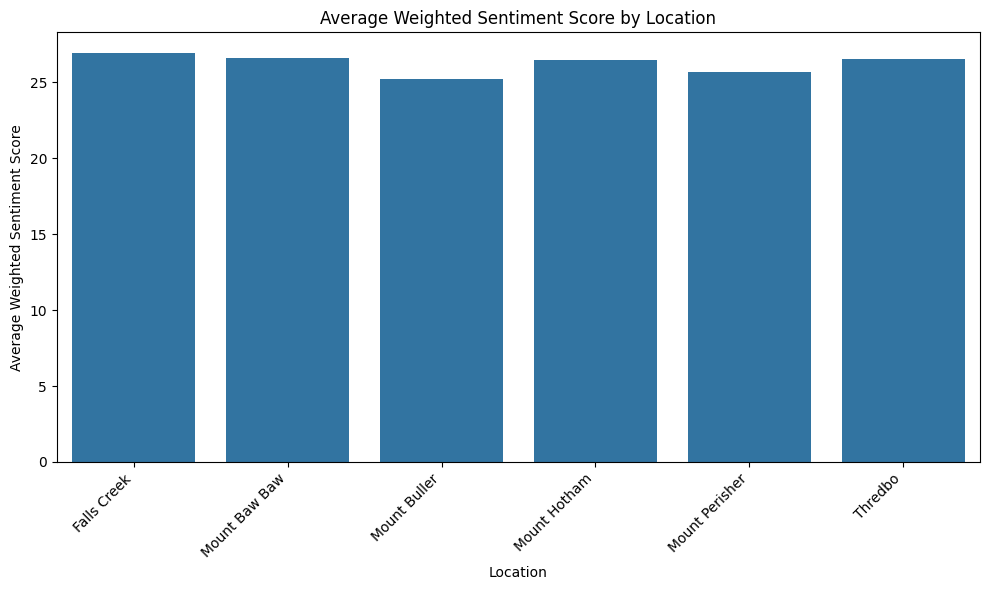


Average Weighted Sentiment Scores:


,location,weighted_sentiment_score
0,Falls Creek,26.945442
1,Mount Baw Baw,26.632074
2,Mount Buller,25.214001
3,Mount Hotham,26.476790
4,Mount Perisher,25.682734
5,Thredbo,26.507610


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 5: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='weighted_sentiment_score', data=average_scores_by_location)
plt.title('Average Weighted Sentiment Score by Location')
plt.xlabel('Location')
plt.ylabel('Average Weighted Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('sentiment.png')

from google.colab import files
files.download('sentiment.png')


# Step 6: Finish task
plt.show()


# Print the aggregated data as a summary
print("\nAverage Weighted Sentiment Scores:")
display(average_scores_by_location)


# Task
Load the "merged_pass_data" CSV file into a pandas DataFrame, filter it to include only 'weekday' pass types, and then plot the prices for 'child', 'junior', 'adult', and 'senior' age groups using a bar chart.

## Load data

### Subtask:
Load the `merged_pass_data` CSV file into a pandas DataFrame.


**Reasoning**:
The subtask is to load the `merged_pass_data` CSV file into a pandas DataFrame and store it in a variable named `pass_data_df`. This can be achieved using the `pd.read_csv()` function.



In [68]:
pass_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/merged_pass_data-2.csv')
pass_data_df

,Location,pass_type,Kid (1-5),Child (6-12),junior (13-17),adult (18-64),senior (>65)
0,Thredbo,Weekday,0.0,113.0,121.0,209.0,121.0
1,Thredbo,Weekend,0.0,103.0,111.0,203.0,111.0
2,Thredbo,Two day pass,0.0,202.0,212.0,382.0,212.0
3,Thredbo,Week Pass,0.0,609.0,630.0,1099.0,630.0
4,Perisher,Weekday,0.0,141.0,256.0,256.0,205.0
5,Perisher,Weekend,0.0,132.0,264.0,264.0,211.0
6,Perisher,Half Day,0.0,106.0,192.0,192.0,154.0
7,Perisher,Two day pass,0.0,283.0,515.0,515.0,412.0
8,Perisher,Week Pass,0.0,975.0,1773.0,1773.0,1418.0
9,Mt. Buller,Weekday,0.0,76.0,76.0,126.0,94.0


## Filter data

### Subtask:
Filter the DataFrame to keep only rows where `pass_type` is 'weekday'.


**Reasoning**:
Filter the DataFrame to keep only rows where pass_type is 'Weekday' and then display the head of the filtered DataFrame.



In [70]:
weekday_passes_df = pass_data_df[pass_data_df['pass_type'] == 'Weekday'].copy()
weekday_passes_df['Location']

,Location
0,Thredbo
4,Perisher
9,Mt. Buller
14,Falls Creek
18,Mt. Hotham
23,Mt. Baw Baw
24,Selwyn
27,Charlotte


## Prepare data for plotting

### Subtask:
Select the columns relevant for plotting (age groups and prices).


**Reasoning**:
Select the relevant columns for plotting from the filtered DataFrame.



In [64]:
plotting_data = weekday_passes_df[['Location', 'Child (6-12)', 'junior (13-17)', 'adult (18-64)', 'senior (>65)']]
display(plotting_data.head())

,Location,Child (6-12),junior (13-17),adult (18-64),senior (>65)
0,Thredbo,113.0,121.0,209.0,121.0
4,Perisher,141.0,256.0,256.0,205.0
9,Mt. Buller,76.0,76.0,126.0,94.0
14,Falls Creek,97.0,97.0,177.0,142.0
18,Mt. Hotham,102.0,102.0,186.0,149.0


## Visualize data

### Subtask:
Create a plot (e.g., a bar plot or grouped bar plot) to show the prices for child, junior, adult, and senior passes on weekdays.


**Reasoning**:
Create a bar plot to visualize the weekday pass prices for different age groups across locations using the prepared data.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x700 with 0 Axes>

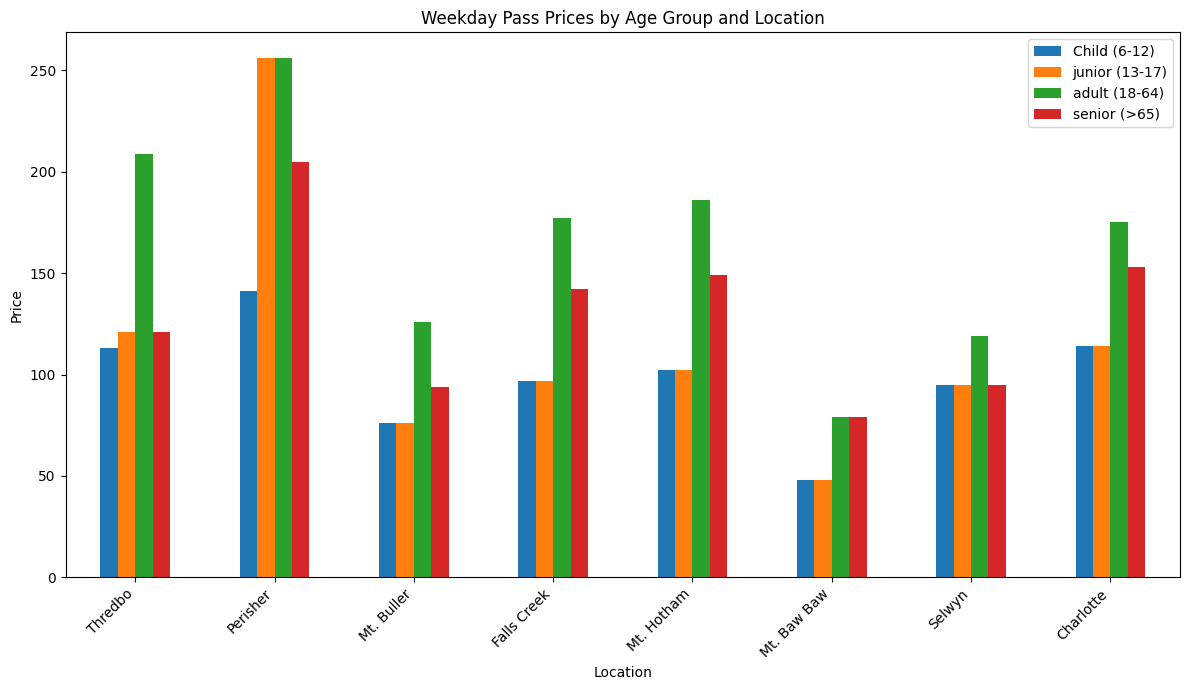

In [71]:
plt.figure(figsize=(12, 7))
plotting_data.set_index('Location').plot(kind='bar', figsize=(12, 7))
plt.title('Weekday Pass Prices by Age Group and Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('pass_price.png')

files.download('pass_price.png')
plt.show()



## Summary:

### Data Analysis Key Findings

*   The analysis focused on weekday pass prices for different age groups ('child', 'junior', 'adult', and 'senior') across various locations.
*   A bar chart was successfully generated to visualize the weekday pass prices by age group and location.

### Insights or Next Steps

*   Analyze the generated plot to identify which age groups have the highest weekday pass prices and how prices vary across different locations.
*   Consider including other pass types (e.g., weekend, daily) in the analysis to compare pricing strategies.


# Task
Load the "visitation.csv" file into a pandas DataFrame and plot the visitation data.

## Load data

### Subtask:
Load the `visitation.csv` file into a pandas DataFrame.


**Reasoning**:
Load the `visitation.csv` file into a pandas DataFrame and display the first 5 rows to verify the loading.



In [44]:
visitation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/Visitation.csv')
display(visitation_df.head())

,Year,Week,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
0,2014,1,555,60,3483,2790,8296,1041,5535,7370,408
1,2014,2,804,42,1253,1425,1987,383,2090,2751,151
2,2014,3,993,30,2992,2101,2413,597,3216,4255,230
3,2014,4,2976,165,9680,9544,18831,2877,15497,20265,1134
4,2014,5,11112,645,29628,26211,49217,8588,46546,61339,3403


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

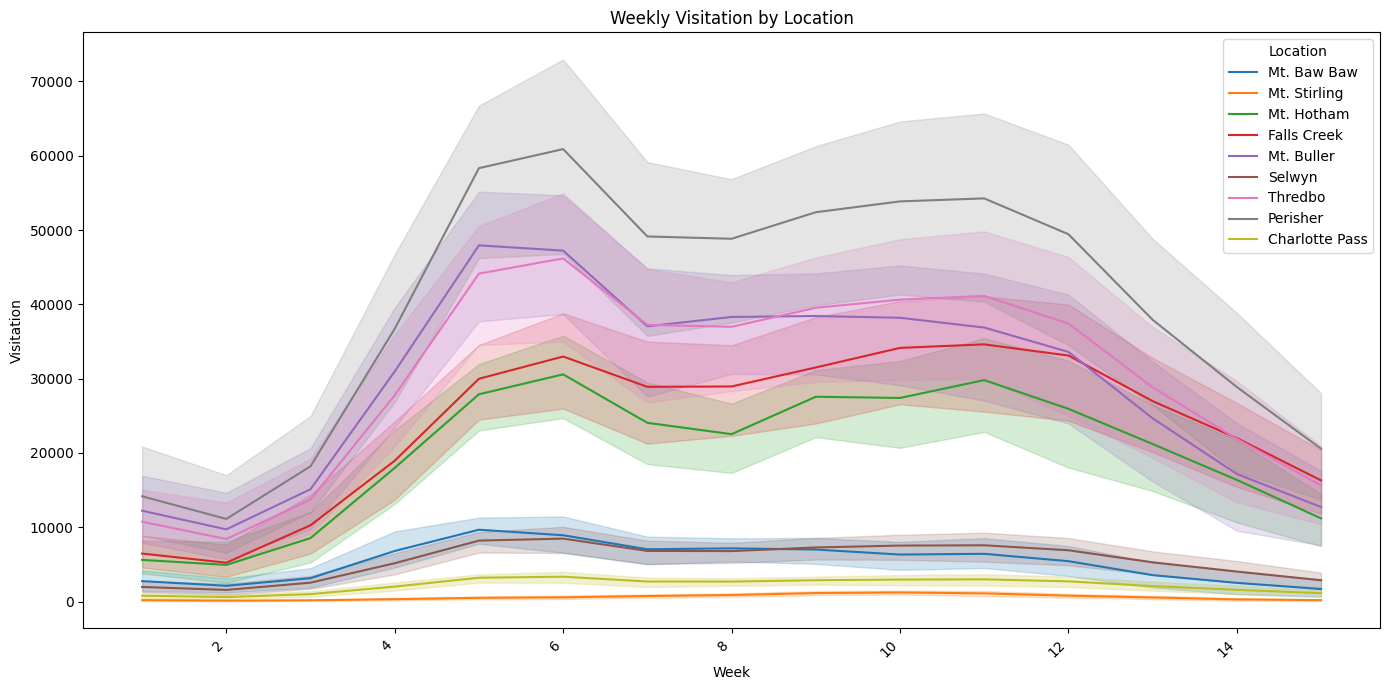


Visitation Data (Melted):


,Year,Week,Location,Visitation
0,2014,1,Mt. Baw Baw,555
1,2014,2,Mt. Baw Baw,804
2,2014,3,Mt. Baw Baw,993
3,2014,4,Mt. Baw Baw,2976
4,2014,5,Mt. Baw Baw,11112


In [47]:
# Prepare data for plotting - Step 2 of the plan
# Combine 'Year' and 'Week' into a single time identifier if needed, or use them as is
# For simplicity, let's plot visitation over the 'Week' for each 'Year'

# Melt the DataFrame to have locations as a variable
visitation_melted_df = visitation_df.melt(id_vars=['Year', 'Week'],
                                           var_name='Location',
                                           value_name='Visitation')

# Visualize data - Step 3 of the plan
plt.figure(figsize=(14, 7))
sns.lineplot(data=visitation_melted_df, x='Week', y='Visitation', hue='Location')
plt.title('Weekly Visitation by Location')
plt.xlabel('Week')
plt.ylabel('Visitation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('visitation.png')
files.download('visitation.png')


# Finish task - Step 4 of the plan
plt.show()

# Display a summary of the melted data
print("\nVisitation Data (Melted):")
display(visitation_melted_df.head())

# Task
Load "climate.csv", plot the mean temperature and assume any precipitation is snowfall.

## Load data

### Subtask:
Load the `climate.csv` file into a pandas DataFrame.


**Reasoning**:
Load the climate.csv file into a pandas DataFrame and display the first 5 rows.



In [56]:
climate_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/climate.csv')
display(climate_df.head())

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Rainfall amount (millimetres)
0,71075,2010,1,1,NaN,NaN,NaN
1,71075,2010,1,2,NaN,NaN,NaN
2,71075,2010,1,3,NaN,NaN,NaN
3,71075,2010,1,4,NaN,NaN,NaN
4,71075,2010,1,5,NaN,NaN,NaN


## Prepare data

### Subtask:
Inspect the data, handle any missing values or incorrect data types, and prepare the data for plotting (e.g., ensure date columns are in datetime format).


**Reasoning**:
Inspect the data types, convert date columns, handle missing values, and rename columns as per the subtask instructions.



In [57]:
# Inspect data types
print("Initial DataFrame Info:")
climate_df.info()

# Convert 'Year', 'Month', and 'Day' into a single datetime column
climate_df['Date'] = pd.to_datetime(climate_df[['Year', 'Month', 'Day']])

# Handle missing values in relevant numerical columns by imputing with the mean
numerical_cols = ['Maximum temperature (Degree C)', 'Minimum temperature (Degree C)', 'Rainfall amount (millimetres)']
for col in numerical_cols:
    climate_df[col].fillna(climate_df[col].mean(), inplace=True)

# Rename columns
climate_df.rename(columns={
    'Maximum temperature (Degree C)': 'Max_Temp_C',
    'Minimum temperature (Degree C)': 'Min_Temp_C',
    'Rainfall amount (millimetres)': 'Rainfall_mm'
}, inplace=True)

# Display the first few rows and info of the modified DataFrame
print("\nModified DataFrame Head:")
display(climate_df.head())

print("\nModified DataFrame Info:")
climate_df.info()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39813 entries, 0 to 39812
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bureau of Meteorology station number  39813 non-null  int64  
 1   Year                                  39813 non-null  int64  
 2   Month                                 39813 non-null  int64  
 3   Day                                   39813 non-null  int64  
 4   Maximum temperature (Degree C)        38275 non-null  float64
 5   Minimum temperature (Degree C)        38280 non-null  float64
 6   Rainfall amount (millimetres)         37857 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.1 MB

Modified DataFrame Head:


/tmp/ipython-input-1505761834.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  climate_df[col].fillna(climate_df[col].mean(), inplace=True)


,Bureau of Meteorology station number,Year,Month,Day,Max_Temp_C,Min_Temp_C,Rainfall_mm,Date
0,71075,2010,1,1,9.900546,2.75465,4.694667,2010-01-01
1,71075,2010,1,2,9.900546,2.75465,4.694667,2010-01-02
2,71075,2010,1,3,9.900546,2.75465,4.694667,2010-01-03
3,71075,2010,1,4,9.900546,2.75465,4.694667,2010-01-04
4,71075,2010,1,5,9.900546,2.75465,4.694667,2010-01-05



Modified DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39813 entries, 0 to 39812
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Bureau of Meteorology station number  39813 non-null  int64         
 1   Year                                  39813 non-null  int64         
 2   Month                                 39813 non-null  int64         
 3   Day                                   39813 non-null  int64         
 4   Max_Temp_C                            39813 non-null  float64       
 5   Min_Temp_C                            39813 non-null  float64       
 6   Rainfall_mm                           39813 non-null  float64       
 7   Date                                  39813 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.4 MB


## Visualize mean temperature

### Subtask:
Create a plot (e.g., a line plot) to show the mean temperature over time or across locations.


**Reasoning**:
Calculate the mean temperature and create a line plot to visualize it over time, adding necessary labels and title for clarity.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

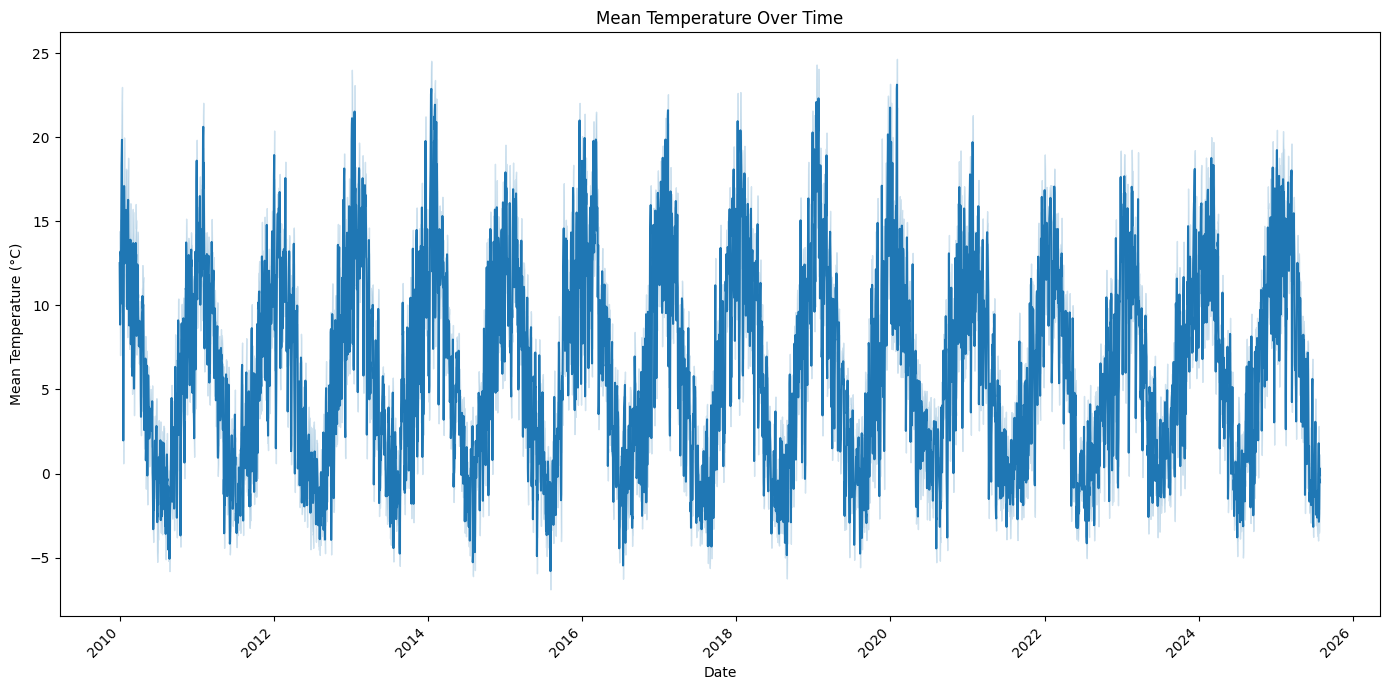

In [59]:
# Calculate the mean temperature
climate_df['Mean_Temp_C'] = (climate_df['Max_Temp_C'] + climate_df['Min_Temp_C']) / 2

# Create a line plot of the 'Mean_Temp_C' over 'Date'
plt.figure(figsize=(14, 7))
sns.lineplot(data=climate_df, x='Date', y='Mean_Temp_C')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('mean_temp.png')
files.download('mean_temp.png')
plt.show()

## Visualize precipitation (snowfall)

### Subtask:
Create a plot (e.g., a line plot or bar plot) to show the precipitation (assumed snowfall) over time or across locations.


**Reasoning**:
Create a line plot to visualize the precipitation (assumed snowfall) over time using the 'Date' and 'Rainfall_mm' columns in the `climate_df` DataFrame, add appropriate labels and title, rotate x-axis labels, and ensure a tight layout.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

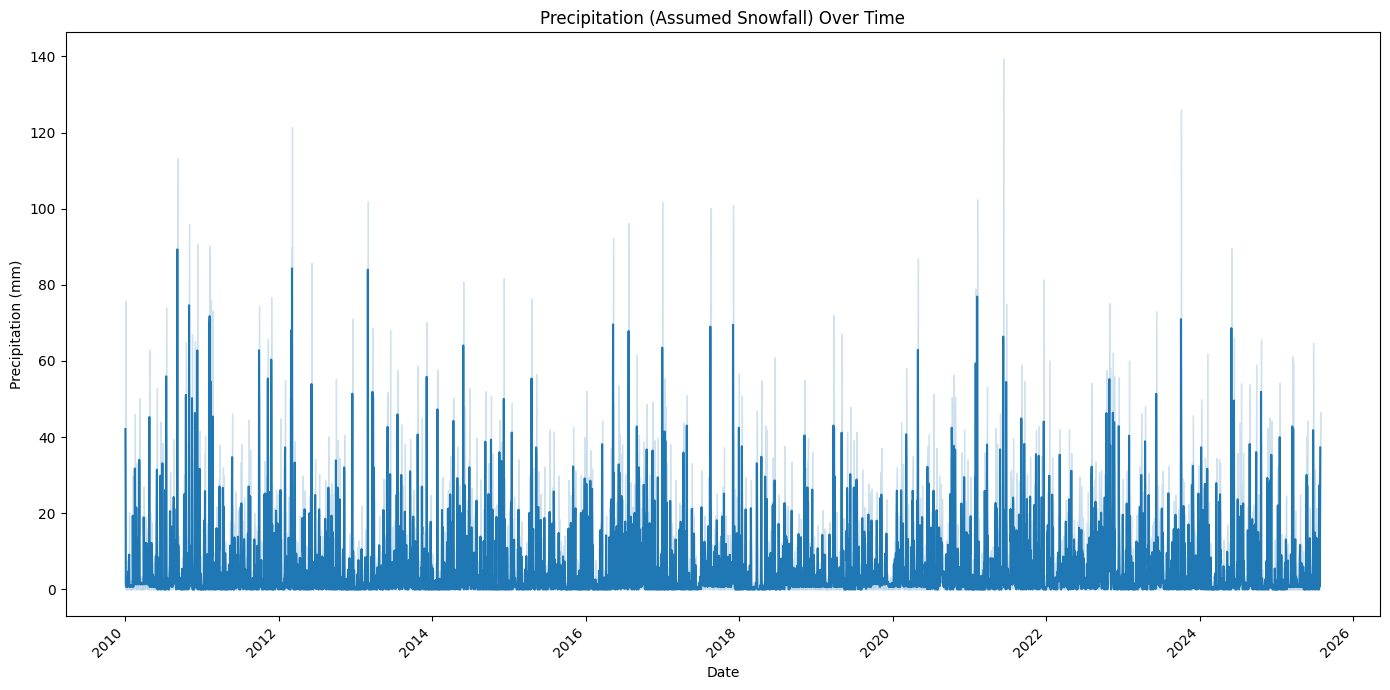

In [60]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=climate_df, x='Date', y='Rainfall_mm')
plt.title('Precipitation (Assumed Snowfall) Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('precipitation.png')
files.download('precipitation.png')
plt.show()

## Combine visualizations (optional)

### Subtask:
Combine the temperature and precipitation plots or create a combined plot type to show their relationship.


**Reasoning**:
Combine the temperature and precipitation plots onto a single figure with two y-axes to show their relationship over time.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

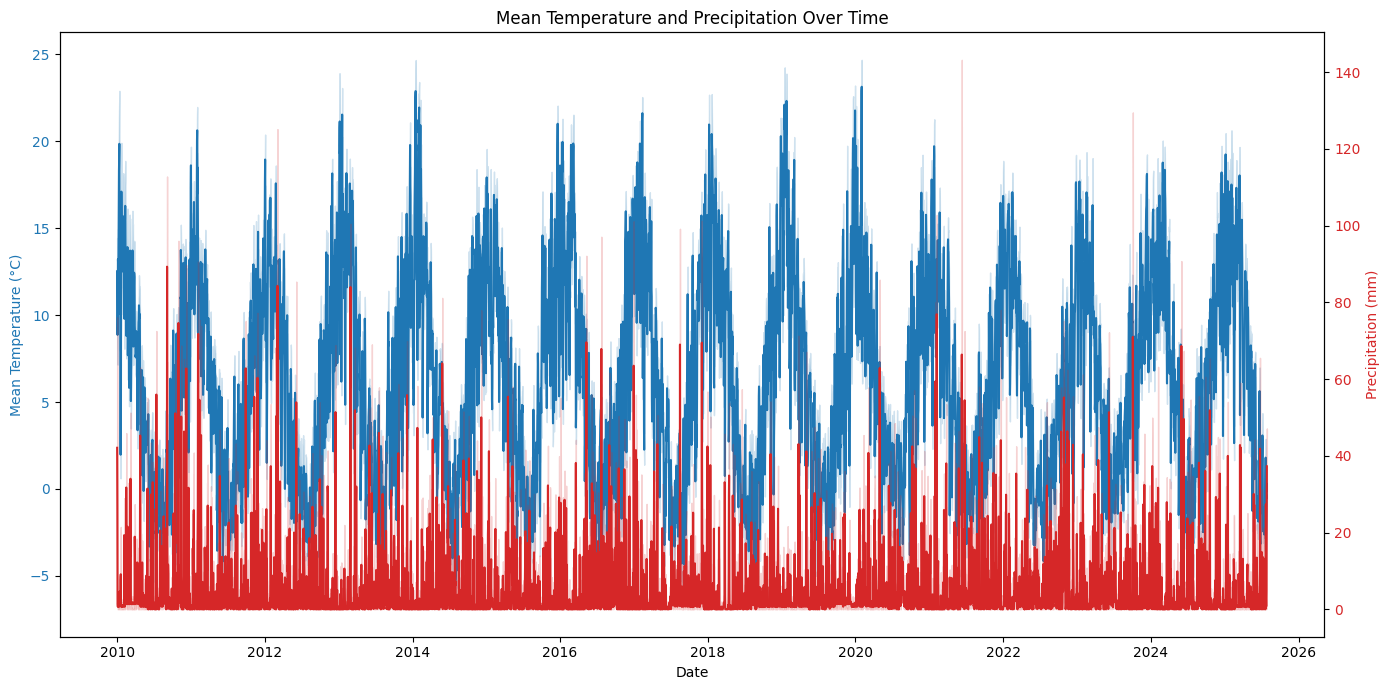

In [61]:
# Create a figure and a primary axes for the mean temperature plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create a secondary axes that shares the same x-axis for the precipitation plot
ax2 = ax1.twinx()

# Plot the 'Mean_Temp_C' on the primary axes
sns.lineplot(data=climate_df, x='Date', y='Mean_Temp_C', ax=ax1, color='tab:blue')
ax1.set_ylabel('Mean Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot the 'Rainfall_mm' on the secondary axes
sns.lineplot(data=climate_df, x='Date', y='Rainfall_mm', ax=ax2, color='tab:red')
ax2.set_ylabel('Precipitation (mm)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set appropriate labels and titles for the overall plot
ax1.set_xlabel('Date')
plt.title('Mean Temperature and Precipitation Over Time')
plt.xticks(rotation=45, ha='right')

# Ensure layout is tight
fig.tight_layout()

plt.savefig('combined_plot.png')
files.download('combined_plot.png')

# Display the combined plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   Missing values in the 'Maximum temperature (Degree C)', 'Minimum temperature (Degree C)', and 'Rainfall amount (millimetres)' columns were imputed with the mean of their respective columns.
*   The 'Year', 'Month', and 'Day' columns were successfully combined and converted into a single 'Date' column of datetime format.
*   The columns 'Maximum temperature (Degree C)', 'Minimum temperature (Degree C)', and 'Rainfall amount (millimetres)' were renamed to 'Max\_Temp\_C', 'Min\_Temp\_C', and 'Rainfall\_mm', respectively.
*   A new column 'Mean\_Temp\_C' was created by averaging the 'Max\_Temp\_C' and 'Min\_Temp\_C'.
*   Line plots were generated showing the trend of mean temperature over time and precipitation over time.
*   A combined plot was successfully created using a secondary y-axis to visualize the relationship between mean temperature and precipitation over time.

### Insights or Next Steps

*   Analyze the seasonal trends evident in the temperature and precipitation plots.
*   Explore potential correlations between mean temperature and precipitation amounts, assuming precipitation is snowfall, especially during colder periods.


# Task
Load the "merged_snowfall_data-2.csv" file into a pandas DataFrame and plot the data.

## Load data

### Subtask:
Load the `merged_snowfall_data-2.csv` file into a pandas DataFrame.


**Reasoning**:
Load the merged_snowfall_data-2.csv file into a pandas DataFrame and display the first 5 rows to verify successful loading.



In [72]:
snowfall_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datathon/merged_snowfall_data-2.csv')
display(snowfall_df.head())

,Location,Year,Total Snowfall,Snowfall Days,Average Base Depth,Max Base Depth,Biggest Snowfall
0,Thredbo,2012 - 2013,"94""",12 days,"18""","33""","20"""
1,Thredbo,2013 - 2014,"104""",26 days,"8""","24""","14"""
2,Thredbo,2014 - 2015,"75""",14 days,"52""","66""","20"""
3,Thredbo,2015 - 2016,"63""",27 days,"34""","58""","12"""
4,Thredbo,2016 - 2017,"119""",17 days,"44""","71""","28"""


## Inspect data

### Subtask:
Inspect the DataFrame to understand its structure, columns, and data types.


**Reasoning**:
Inspect the DataFrame's structure and data types, then display descriptive statistics to understand the data distribution.



In [73]:
print("DataFrame Info:")
snowfall_df.info()

print("\nDescriptive Statistics:")
display(snowfall_df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location            99 non-null     object
 1   Year                99 non-null     object
 2   Total Snowfall      99 non-null     object
 3   Snowfall Days       99 non-null     object
 4   Average Base Depth  99 non-null     object
 5   Max Base Depth      99 non-null     object
 6   Biggest Snowfall    84 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB

Descriptive Statistics:


,Location,Year,Total Snowfall,Snowfall Days,Average Base Depth,Max Base Depth,Biggest Snowfall
count,99,99,99,99,99,99,84
unique,8,13,59,31,40,51,22
top,Thredbo,2012 - 2013,"52""",12 days,"0""","33""","12"""
freq,13,8,4,11,14,6,13


## Prepare data

### Subtask:
Clean and prepare the data for plotting, if necessary (e.g., handle missing values, convert data types, reshape the DataFrame).


**Reasoning**:
Clean the numerical columns by removing the '"' character and converting them to numeric, handle missing values by imputing with the mean, and prepare the 'Year' column for plotting.



In [74]:
# Clean numerical columns by removing '"' and converting to numeric
cols_to_clean = ['Total Snowfall', 'Average Base Depth', 'Max Base Depth', 'Biggest Snowfall']
for col in cols_to_clean:
    # Remove '"' and convert to numeric, coercing errors to NaN
    snowfall_df[col] = snowfall_df[col].astype(str).str.replace('"', '', regex=False).astype(float)

# Handle missing values in numerical columns by imputing with the mean
for col in cols_to_clean:
    snowfall_df[col].fillna(snowfall_df[col].mean(), inplace=True)

# Convert 'Year' to a consistent format for plotting, e.g., the starting year of the season
snowfall_df['Start_Year'] = snowfall_df['Year'].astype(str).str.split(' - ').str[0].astype(int)

# Display the first few rows and info of the modified DataFrame
print("\nModified DataFrame Head:")
display(snowfall_df.head())

print("\nModified DataFrame Info:")
snowfall_df.info()


Modified DataFrame Head:


/tmp/ipython-input-1427342543.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  snowfall_df[col].fillna(snowfall_df[col].mean(), inplace=True)


,Location,Year,Total Snowfall,Snowfall Days,Average Base Depth,Max Base Depth,Biggest Snowfall,Start_Year
0,Thredbo,2012 - 2013,94.0,12 days,18.0,33.0,20.0,2012
1,Thredbo,2013 - 2014,104.0,26 days,8.0,24.0,14.0,2013
2,Thredbo,2014 - 2015,75.0,14 days,52.0,66.0,20.0,2014
3,Thredbo,2015 - 2016,63.0,27 days,34.0,58.0,12.0,2015
4,Thredbo,2016 - 2017,119.0,17 days,44.0,71.0,28.0,2016



Modified DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            99 non-null     object 
 1   Year                99 non-null     object 
 2   Total Snowfall      99 non-null     float64
 3   Snowfall Days       99 non-null     object 
 4   Average Base Depth  99 non-null     float64
 5   Max Base Depth      99 non-null     float64
 6   Biggest Snowfall    99 non-null     float64
 7   Start_Year          99 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 6.3+ KB


## Visualize data

### Subtask:
Create a plot (e.g., a line plot, bar plot, or scatter plot) to visualize the snowfall data. The type of plot will depend on the data's structure and the insights you want to convey.


**Reasoning**:
Create a line plot to visualize the 'Total Snowfall' over 'Start_Year' for each 'Location' and save the plot as 'total_snowfall.png' and download it.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

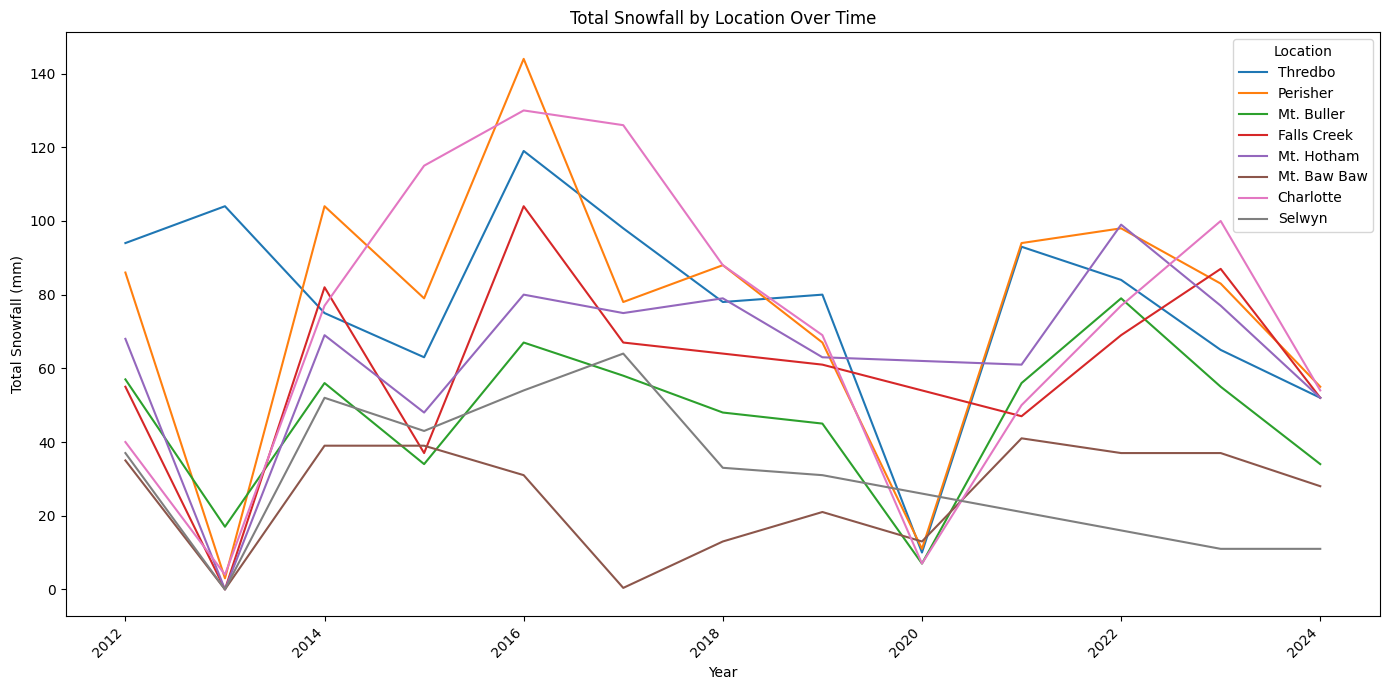

In [75]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=snowfall_df, x='Start_Year', y='Total Snowfall', hue='Location')
plt.title('Total Snowfall by Location Over Time')
plt.xlabel('Year')
plt.ylabel('Total Snowfall (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('total_snowfall.png')
files.download('total_snowfall.png')

plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial data inspection revealed that all columns were of the `object` data type and some numerical columns contained extra characters like '"'.
*   Missing values were present in the numerical columns.
*   After cleaning, the numerical columns (`Total Snowfall`, `Average Base Depth`, `Max Base Depth`, and `Biggest Snowfall`) were converted to `float` and missing values were imputed with the mean.
*   A new integer column, `Start_Year`, was created from the `Year` column to represent the beginning year of the season for plotting purposes.
*   The line plot shows the trend of `Total Snowfall` for each `Location` over the years from 2012 to 2021.

### Insights or Next Steps

*   Analyze specific trends or anomalies observed in the line plot for individual locations.
*   Explore correlations between `Total Snowfall` and other metrics like `Snowfall Days` or `Average Base Depth`.
